<a href="https://colab.research.google.com/github/Vekz/ComputerSecurity-Cryptography/blob/main/LFSR_StreamCypher_Autokey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr>
    <th>
    Wydział Informatyki, Katedra SIiSK </br> PS Bezpieczeństwa Sieci            Komputerowych
    </th>
    <th>
    Data: 16.03.2021
    </th>
  </tr>
  <tr>
    <td>
    Ćwiczenie nr 4</br>Temat: Generatory liczb pseudolosowych. Szyfry Strumieniowe.
</br>Grupa nr 2</br>Artur Porowski
    </td>
    <td>
    Prowadzący:  mgr inż. Dariusz Jankowski</br>Ocena:
    </td>
  </tr>
<table>

In [ ]:
import doctest
import string

# Zadanie 1
## Treść
Zaimplementuj generator liczb pseudolosowych bazujący na LFSR o zadanym stopniu wielomianu.
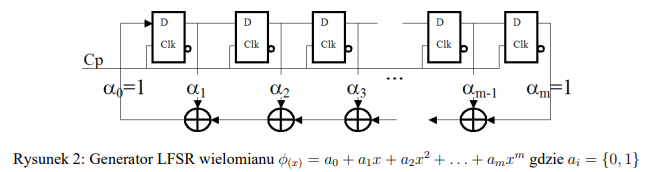
## Rozwiązanie

In [ ]:
def shift_registry_insert(arr, value):
  """
  Function that shifts array to right and adds value in the beggining

  :param arr: list to be shifted and value inserted in begging
  :type arr: list
  :param value: value to be inserted

  >>> a = [3, 2, 1]
  >>> shift_registry_insert(a, 6)
  >>> print(a)
  [6, 3, 2]
  """
  arr.pop()
  arr.insert(0,value)

def LFSR(polynomial,seed):
  """ 
  Generates next values based on given primitive polynomial a0 + a1x + a2x^2 + ... + amx^n
  and seed value. 

  :param polynomial: weights for every degree of primitive polynomial values of {0, 1}
  :type polynomial: str
  :param seed: seed for generator; should be same len() as polynomial provided
  :type seed: str

  :return: Generator for LFSR on given parameters

  Maximal length LFSR Case #2 for n=3 => cycle should be equal 7
  >>> a = LFSR("1011", "0011")
  >>> x = ""
  >>> for i in range(24):
  ...   if(i%6 == 0):
  ...     print(x)
  ...     x = ""
  ...   x += str(next(a))
  <BLANKLINE>
  011100
  011100
  011100

  Pdf LFSR_pdf("1001", "0110")
  >>> a = LFSR("1001", "0110")
  >>> x = ""
  >>> for i in range(8):
  ...   if(i % 7 == 0):
  ...     print(x)
  ...   x += str(next(a))
  <BLANKLINE>
  0100011

  Pdf LFSR_pdf("1001", "0010")
  >>> a = LFSR("1001", "0010")
  >>> x = ""
  >>> for i in range(8):
  ...   if(i % 7 == 0):
  ...     print(x)
  ...   x += str(next(a))
  <BLANKLINE>
  0111101
  """
  taps = [int(x) for x in str(polynomial)]
  values = [int(x) for x in str(seed)]
  idW = 0

  while True:
    #print(values) # For testing purposes print state
    output = values[-1]

    # XORing on certain places according to primitive polynomial
    for i in range(len(taps)-1): # For taps other than output tap and input tap
      if(taps[i]==1): # If tap exists
        output = output ^ values[i] # Xor output of previous tap with value at this tap

    #print(output)
    yield(output)

    shift_registry_insert(values, output)
    

doctest.run_docstring_examples(shift_registry_insert, globals(), name="Shift Registry with Insert value")
doctest.run_docstring_examples(LFSR, globals(), name="LFSR RNG")

NameError: ignored

## Opis algorytmu
Generator implementuje LFSR z obsługą seedowania. Yeilduje wartość, obliczoną co iterację na podstawie wartości z wielomianu i poprzednich stanów generatora, wyjście jest zwracane i zarazem przesunięte na początek rejestru.

# Zadanie 2
## Treść
Zaimplementuj kryptosystem bazujący na schemacie Synchronous Stream Cipher dla podanego wielomianu i ziarna.
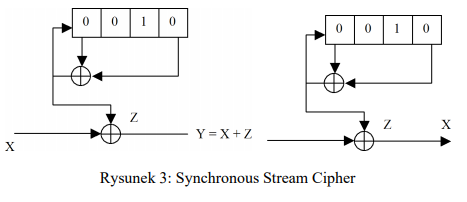
## Rozwiązanie

In [ ]:
def SSC(input, polynomial, seed):
  """
  Encode or decode the word using LFSR with given polynomial and seed.

  Encode Case #1
  >>> SSC("11101001", "1001", "0010")
  '10010011'

  Decode Case #1
  >>> SSC("10010011", "1001", "0010")
  '11101001'

  """
  input = [int(x) for x in str(input)]

  gen = LFSR(polynomial, seed)
  L = [next(gen) for _ in input]

  output = ""
  for x, z in zip(input, L):
    val = x^z
    output += str(val)
  return output


doctest.run_docstring_examples(SSC, globals(), name="encode word using LFSR")

## Opis algorytmu
Wykorzystując LFSR, generowana jest lista wartości o długości równej długości słowa wejściowego. Po czym budowane jest słowo wyjściowe z xor'a wartości LFSR i wartości słowa wejściowego.

# Zadanie 3
## Treść
Zaimplementuj kryptosystem bazujący na schemacie Ciphertext Autokey dla podanego wielomianu i ziarna.
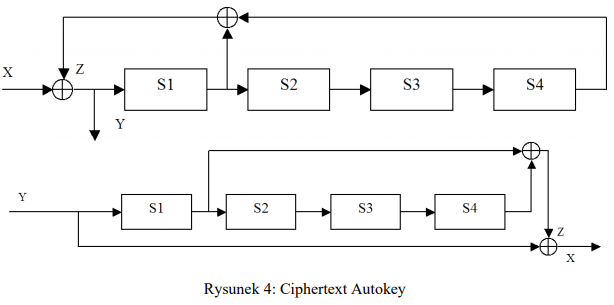
## Rozwiązanie

In [ ]:
def encode_Autokey(input, polynomial, seed):
  """
  Encode the word using modified LFSR RNG to generate output based on input, polynomial and seed

  >>> encode_Autokey("11101001", "1001", "0011")
  '00110011'

  >>> encode_Autokey("11001", "100011", "110111")
  '01010'

  """
  L = []
  input = [int(x) for x in str(input)]
  taps = [int(x) for x in str(polynomial)]
  values = [int(x) for x in str(seed)]
  idW = 0



  for x in input:
    #print(values) # For testing purposes print state
    output = values[-1]

    # XORing on certain places according to primitive polynomial
    for i in range(len(taps)-1): # For taps other than output tap and input tap
      if(taps[i]==1): # If tap exists
        output = output ^ values[i] # Xor output of previous tap with value at this tap

    #print(output)
    output = output ^ x
    L.append(output)
    shift_registry_insert(values, output)

  return "".join(map(str,L))




def decode_Autokey(input, polynomial, seed):
  """
  Decode the word using modified LFSR RNG to generate output based on input, polynomial and seed

  >>> decode_Autokey("00110011", "1001", "0011")
  '11101001'

  >>> decode_Autokey("01010", "100011", "110111")
  '11001'

  """
  L = []
  input = [int(x) for x in str(input)]
  taps = [int(x) for x in str(polynomial)]
  values = [int(x) for x in str(seed)]
  idW = 0



  for x in input:
    #print(values) # For testing purposes print state
    output = values[-1]

    # XORing on certain places according to primitive polynomial
    for i in range(len(taps)-1): # For taps other than output tap and input tap
      if(taps[i]==1): # If tap exists
        output = output ^ values[i] # Xor output of previous tap with value at this tap

    #print(output)
    output = output ^ x
    L.append(output)
    shift_registry_insert(values, x)

  return "".join(map(str,L))

doctest.run_docstring_examples(encode_Autokey, globals(), name="Encode the word using SSC Autokey")
doctest.run_docstring_examples(decode_Autokey, globals(), name="Decode the word using SSC Autokey")


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/doctest.py", line 1487, in run
    sys.settrace(save_trace)



## Opis algorytmu
Jest to zmodyfikowany LFSR.
Jedyne czym różnią się te funkcje od LFSR to w przypadku:
### Kodowania
Dodana jest linijka, która przed zwróceniem wartości wyjściowej LFSR XORuje ją z odpowiednią literą słowa wejściowego. I na tej podstawie budowane jest słowo wyjściowe.
### Dekodowanie
Dodana jest linijka, która przed zwróceniem wartości wyjściowej LFSR XORuje ją z odpowiednią literą słowa wejściowego. A wartość wchodząca spowrotem do rejestru jest zmieniona na odpowiednią literę słowa wejściowego.